In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Data preprocessing
shoppers_data = pd.read_csv("online_shoppers_intention.csv")
print(shoppers_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

This dataset contains 12,330 records of online shopping behavior, tracking visitor activity, engagement, and purchase decisions. It includes administrative and informational page visits, product-related interactions, bounce and exit rates, page values, special days, and technical details like the visitor's operating system, browser, region, and traffic type. The target variable, Revenue, indicates whether a visitor made a purchase (True/False), making this a binary classification problem.
Project Workflow & Techniques Used:
   * Data Cleaning: Handled missing values, outliers, and inconsistencies.
   * Over-Sampling & Under-Sampling: Balanced the dataset using techniques like SMOTE to handle class imbalance.
   * Train-Test Splitting: Prepared the dataset for training and evaluation.
Machine Learning Models Applied (Scikit-Learn):
    * Logistic Regression, Naïve Bayes, KNN, Decision Tree (with pruning), Gradient Boosting, SVM, Bagging, Boosting, Random Forest, and Neural Networks were implemented.
Model Evaluation:
    * Created a confusion matrix heatmap to analyze classification performance.
    * ROC Curve & Precision-Recall Curve to assess model effectiveness.
    * Feature Selection to identify important predictors.
Visualizations & Insights:
   * Matplotlib was used to create pie charts, histograms, and other visualizations to understand visitor behavior and traffic trends.
Use Cases:
   * Customer Purchase Prediction: Classifies whether a visitor is likely to make a purchase.
   * Website Optimization: Helps e-commerce businesses understand which features influence purchases.
   * Traffic Analysis: Identifies visitor trends across different regions, devices, and times of the year.
   *  Marketing Strategy: Improves targeted marketing efforts based on user behavior.
This project provides valuable insights for e-commerce platforms to enhance customer experience, optimize website design, and increase conversions. 🛍️📊


In [ ]:
shoppers_data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Data cleansing
shoppers_data = shoppers_data.drop(['Month'], axis=1)
shoppers_data['VisitorType'] = shoppers_data['VisitorType'].astype('category').cat.codes

print(shoppers_data['Revenue'].value_counts())
print(shoppers_data.info())

Revenue
False    10422
True      1908
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType 

In [ ]:
# Train Test dataset
X = shoppers_data.drop(columns = "Revenue")
y = shoppers_data["Revenue"]

train_X, valid_X, train_y, valid_y = train_test_split(X, y,
                                                      test_size = 0.2,
                                                      random_state = 0)

# Oversampled dataset
overs = SMOTE()
X_train_OS, y_train_OS = overs.fit_resample(train_X, train_y)

# Undersampled dataset
unders = RandomUnderSampler()
X_train_US, y_train_US = unders.fit_resample(train_X, train_y)

In [ ]:
# Logistic Regression model on original dataset

# Standardize features to equalize the impact of features & improve convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(valid_X)

# Using liblinear solver because it is suitable for small to medium datasets
# And it performs well for dataset having many features
# And suitable for binary classification
lg = LogisticRegression(solver='liblinear', max_iter=100, penalty='l2', C=1e42)
lg.fit(X_train_scaled, train_y)

lg_pred = lg.predict(X_test_scaled)

lg_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": lg_pred})
print(lg_pred_df.head(5))
print()
print(classification_report(valid_y, lg_pred))

       Actual  Predicted
12245   False      False
9704    False      False
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2044
        True       0.76      0.37      0.50       422

    accuracy                           0.87      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.86      0.87      0.85      2466



In [ ]:
# Logistic Regression model on oversampled dataset

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_OS)
X_test_scaled = scaler.transform(valid_X)

lg = LogisticRegression(solver='liblinear', max_iter=100, penalty='l2', C=1e42)
lg.fit(X_train_scaled, y_train_OS)

lg_pred_OS = lg.predict(X_test_scaled)

lg_pred_OS_df = pd.DataFrame({"Actual": valid_y, "Predicted": lg_pred_OS})
print(lg_pred_OS_df.head(5))
print()
print(classification_report(valid_y, lg_pred_OS))

       Actual  Predicted
12245   False      False
9704    False      False
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.93      0.89      0.91      2044
        True       0.56      0.68      0.61       422

    accuracy                           0.85      2466
   macro avg       0.74      0.78      0.76      2466
weighted avg       0.87      0.85      0.86      2466



In [ ]:
# Logistic Regression model on undersampled dataset

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_US)
X_test_scaled = scaler.transform(valid_X)

lg = LogisticRegression(solver='liblinear', max_iter=100, penalty='l2', C=1e42)
lg.fit(X_train_scaled, y_train_US)

lg_pred_US = lg.predict(X_test_scaled)

lg_pred_US_df = pd.DataFrame({"Actual": valid_y, "Predicted": lg_pred_US})
print(lg_pred_US_df.head(5))
print()
print(classification_report(valid_y, lg_pred_US))

       Actual  Predicted
12245   False      False
9704    False       True
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.94      0.90      0.92      2044
        True       0.59      0.71      0.64       422

    accuracy                           0.86      2466
   macro avg       0.76      0.80      0.78      2466
weighted avg       0.88      0.86      0.87      2466



Confusion matrix heatmap for Logistic regression on original, oversampled and undersampled dataset comparison


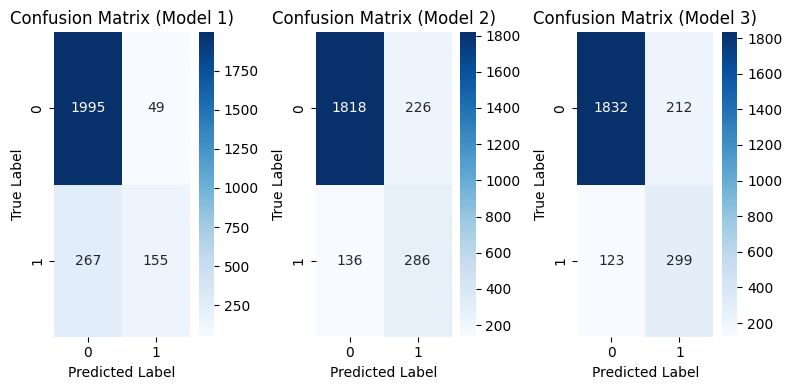

In [ ]:
print("Confusion matrix heatmap for Logistic regression on original, oversampled and undersampled dataset comparison")
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for each model
conf_matrices = [confusion_matrix(valid_y, predictions) for predictions in [lg_pred, lg_pred_OS, lg_pred_US]]

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 4))
for i, conf_matrix in enumerate(conf_matrices, start=1):
    plt.subplot(1, 3, i)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix (Model {i})')
plt.tight_layout()
plt.show()

In [ ]:
# Naive Bayes on original dataset

nb = GaussianNB()
nb.fit(train_X, train_y)

nb_pred = nb.predict(valid_X)

nb_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": nb_pred})
print(nb_pred_df.head(5))
print()
print(classification_report(valid_y, nb_pred))

       Actual  Predicted
12245   False      False
9704    False       True
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.90      0.91      0.90      2044
        True       0.53      0.52      0.53       422

    accuracy                           0.84      2466
   macro avg       0.72      0.71      0.71      2466
weighted avg       0.84      0.84      0.84      2466



In [ ]:
# Naive Bayes on oversampled dataset

nb_OS = GaussianNB()
nb_OS.fit(X_train_OS, y_train_OS)

nb_OS_pred = nb_OS.predict(valid_X)

nb_OS_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": nb_OS_pred})
print(nb_OS_pred_df.head(5))
print()
print(classification_report(valid_y, nb_OS_pred))

       Actual  Predicted
12245   False      False
9704    False       True
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.92      0.79      0.85      2044
        True       0.40      0.68      0.50       422

    accuracy                           0.77      2466
   macro avg       0.66      0.73      0.67      2466
weighted avg       0.83      0.77      0.79      2466



In [ ]:
# Naive Bayes on undersampled dataset

nb_US = GaussianNB()
nb_US.fit(X_train_US, y_train_US)

nb_US_pred = nb_US.predict(valid_X)

nb_US_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": nb_US_pred})
print(nb_US_pred_df.head(5))
print()
print(classification_report(valid_y, nb_US_pred))

       Actual  Predicted
12245   False      False
9704    False       True
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.91      0.85      0.88      2044
        True       0.45      0.58      0.51       422

    accuracy                           0.81      2466
   macro avg       0.68      0.72      0.69      2466
weighted avg       0.83      0.81      0.82      2466



Confusion matrix heatmap for Naive Bayes on original, oversampled and undersampled dataset comparison


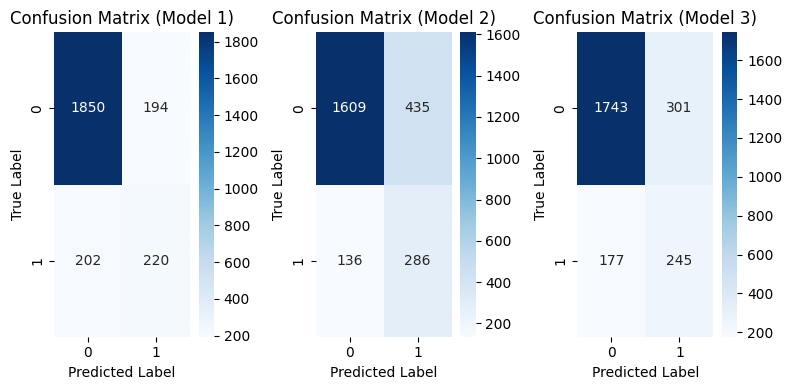

In [ ]:
print("Confusion matrix heatmap for Naive Bayes on original, oversampled and undersampled dataset comparison")

# Compute confusion matrix for each model
conf_matrices = [confusion_matrix(valid_y, predictions) for predictions in [nb_pred, nb_OS_pred, nb_US_pred]]

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 4))
for i, conf_matrix in enumerate(conf_matrices, start=1):
    plt.subplot(1, 3, i)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix (Model {i})')
plt.tight_layout()
plt.show()

In [ ]:
# KNN on original dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(valid_X)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, train_y)

knn_pred = knn.predict(X_test_scaled)

knn_pred_df = pd.DataFrame({"Actual": valid_y, "Predict": knn_pred})

print(knn_pred_df.head(5))
print()
print(classification_report(valid_y, knn_pred))

       Actual  Predict
12245   False    False
9704    False    False
9177    False    False
8848    False    False
2768    False    False

              precision    recall  f1-score   support

       False       0.89      0.97      0.92      2044
        True       0.71      0.40      0.51       422

    accuracy                           0.87      2466
   macro avg       0.80      0.68      0.72      2466
weighted avg       0.86      0.87      0.85      2466



In [ ]:
# KNN on oversampled dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_OS)
X_test_scaled = scaler.transform(valid_X)

knn.fit(X_train_scaled, y_train_OS)
knn_OS_pred = knn.predict(X_test_scaled)

knn_OS_pred_df = pd.DataFrame({"Actual": valid_y, "Predict": knn_OS_pred})

print(knn_OS_pred_df.head(5))
print()
print(classification_report(valid_y, knn_OS_pred))

       Actual  Predict
12245   False    False
9704    False     True
9177    False    False
8848    False    False
2768    False    False

              precision    recall  f1-score   support

       False       0.91      0.85      0.88      2044
        True       0.45      0.61      0.52       422

    accuracy                           0.81      2466
   macro avg       0.68      0.73      0.70      2466
weighted avg       0.83      0.81      0.82      2466



In [ ]:
# KNN on undersampled dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_US)
X_test_scaled = scaler.transform(valid_X)

knn.fit(X_train_scaled, y_train_US)
knn_US_pred = knn.predict(X_test_scaled)

knn_US_pred_df = pd.DataFrame({"Actual": valid_y, "Predict": knn_US_pred})

print(knn_US_pred_df.head(5))
print()
print(classification_report(valid_y, knn_US_pred))

       Actual  Predict
12245   False    False
9704    False     True
9177    False     True
8848    False    False
2768    False    False

              precision    recall  f1-score   support

       False       0.92      0.77      0.84      2044
        True       0.38      0.68      0.49       422

    accuracy                           0.75      2466
   macro avg       0.65      0.73      0.66      2466
weighted avg       0.83      0.75      0.78      2466



Confusion matrix heatmap for KNN on original, oversampled and undersampled dataset comparison


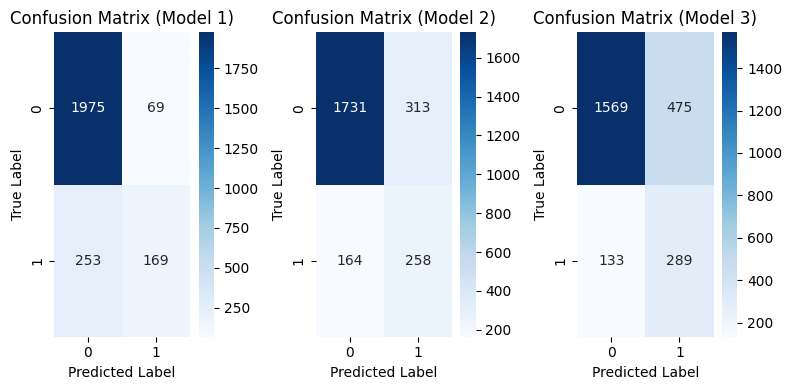

In [ ]:
print("Confusion matrix heatmap for KNN on original, oversampled and undersampled dataset comparison")

# Compute confusion matrix for each model
conf_matrices = [confusion_matrix(valid_y, predictions) for predictions in [knn_pred, knn_OS_pred, knn_US_pred]]

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 4))
for i, conf_matrix in enumerate(conf_matrices, start=1):
    plt.subplot(1, 3, i)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix (Model {i})')
plt.tight_layout()
plt.show()

In [ ]:
# Fully grown categorical tree on original dataset

DT = DecisionTreeClassifier()
DT.fit(train_X, train_y)

dt_pred = DT.predict(valid_X)

dt_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": dt_pred})
print(dt_pred_df.head(5))
print()
print(classification_report(valid_y, dt_pred))

       Actual  Predicted
12245   False      False
9704    False      False
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.91      0.91      0.91      2044
        True       0.56      0.56      0.56       422

    accuracy                           0.85      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.85      0.85      0.85      2466



In [ ]:
# Fully grown categorical tree on an oversampled dataset
DT.fit(X_train_OS, y_train_OS)

dt_OS_pred = DT.predict(valid_X)

dt_OS_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": dt_OS_pred})
print(dt_OS_pred_df.head(5))
print()
print(classification_report(valid_y, dt_OS_pred))

       Actual  Predicted
12245   False       True
9704    False      False
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.92      0.89      0.91      2044
        True       0.54      0.64      0.59       422

    accuracy                           0.85      2466
   macro avg       0.73      0.76      0.75      2466
weighted avg       0.86      0.85      0.85      2466



In [ ]:
# Fully grown categorical tree on undersampled dataset
DT.fit(X_train_US, y_train_US)

dt_US_pred = DT.predict(valid_X)

dt_US_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": dt_US_pred})
print(dt_US_pred_df.head(5))
print()
print(classification_report(valid_y, dt_US_pred))

       Actual  Predicted
12245   False       True
9704    False       True
9177    False      False
8848    False       True
2768    False      False

              precision    recall  f1-score   support

       False       0.93      0.76      0.84      2044
        True       0.39      0.74      0.51       422

    accuracy                           0.76      2466
   macro avg       0.66      0.75      0.67      2466
weighted avg       0.84      0.76      0.78      2466



In [ ]:
# Get best parameters for Pruned categorical tree on original dataset
params = {'max_depth': [5, 10, 15, 20],
          'min_samples_split': [20, 40, 60, 80, 100],
          'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]}

gs = GridSearchCV(DecisionTreeClassifier(random_state = 1),
                  params, cv = 5)

gs.fit(train_X, train_y)
print(f"Score: {gs.best_score_}")
print(f'Parameters: {gs.best_params_}')

Score: 0.899330978349709
Parameters: {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


In [ ]:
# Pruned categorical tree on original dataset
pruned_dt = DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.0005, min_samples_split=20)
pruned_dt.fit(train_X, train_y)

pruned_dt_pred = pruned_dt.predict(valid_X)

pruned_dt_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": pruned_dt_pred})
print(pruned_dt_pred_df.head(5))
print()
print(classification_report(valid_y, pruned_dt_pred))

       Actual  Predicted
12245   False      False
9704    False      False
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2044
        True       0.76      0.53      0.62       422

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



In [ ]:
# Get best parameters for Pruned categorical tree on oversampled dataset
params = {'max_depth': [5, 10, 15, 20],
          'min_samples_split': [20, 40, 60, 80, 100],
          'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]}

gs = GridSearchCV(DecisionTreeClassifier(random_state = 1),
                  params, cv = 5)

gs.fit(X_train_OS, y_train_OS)
print(f"Score: {gs.best_score_}")
print(f'Parameters: {gs.best_params_}')

Score: 0.9026058370350745
Parameters: {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


In [ ]:
# Pruned categorical tree on oversampled dataset
pruned_OS_dt = DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.0001, min_samples_split=20)
pruned_OS_dt.fit(X_train_OS, y_train_OS)

pruned_OS_dt_pred = pruned_OS_dt.predict(valid_X)

pruned_OS_dt_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": pruned_OS_dt_pred})
print(pruned_OS_dt_pred_df.head(5))
print()
print(classification_report(valid_y, pruned_OS_dt_pred))

       Actual  Predicted
12245   False      False
9704    False      False
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.94      0.89      0.92      2044
        True       0.59      0.73      0.65       422

    accuracy                           0.87      2466
   macro avg       0.76      0.81      0.78      2466
weighted avg       0.88      0.87      0.87      2466



In [ ]:
# Get best parameters for Pruned categorical tree on undersampled dataset
params = {'max_depth': [5, 10, 15, 20],
          'min_samples_split': [20, 40, 60, 80, 100],
          'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]}

gs = GridSearchCV(DecisionTreeClassifier(random_state = 1),
                  params, cv = 5)

gs.fit(X_train_US, y_train_US)
print(f"Score: {gs.best_score_}")
print(f'Parameters: {gs.best_params_}')

Score: 0.8485844438785616
Parameters: {'max_depth': 5, 'min_impurity_decrease': 0.005, 'min_samples_split': 20}


In [ ]:
# Pruned categorical tree on undersampled dataset
pruned_US_dt = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.005, min_samples_split=20)
pruned_US_dt.fit(X_train_US, y_train_US)

pruned_US_dt_pred = pruned_US_dt.predict(valid_X)

pruned_US_dt_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": pruned_US_dt_pred})
print(pruned_US_dt_pred_df.head(5))
print()
print(classification_report(valid_y, pruned_US_dt_pred))

       Actual  Predicted
12245   False      False
9704    False      False
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.95      0.89      0.92      2044
        True       0.59      0.79      0.68       422

    accuracy                           0.87      2466
   macro avg       0.77      0.84      0.80      2466
weighted avg       0.89      0.87      0.88      2466



In [ ]:
# Gradient Boosting Classifier on original dataset

GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
GB.fit(train_X, train_y)

gb_pred = GB.predict(valid_X)

gb_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": gb_pred})
print(gb_pred_df.head(5))
print()
print(classification_report(valid_y, gb_pred))

       Actual  Predicted
12245   False      False
9704    False      False
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      2044
        True       0.71      0.52      0.60       422

    accuracy                           0.88      2466
   macro avg       0.81      0.74      0.77      2466
weighted avg       0.87      0.88      0.87      2466



In [ ]:
# Gradient Boosting Classifier on oversampled dataset

GB.fit(X_train_OS, y_train_OS)

gb_OS_pred = GB.predict(valid_X)

gb_OS_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": gb_OS_pred})
print(gb_OS_pred_df.head(5))
print()
print(classification_report(valid_y, gb_OS_pred))

       Actual  Predicted
12245   False      False
9704    False      False
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.94      0.90      0.92      2044
        True       0.60      0.75      0.67       422

    accuracy                           0.87      2466
   macro avg       0.77      0.82      0.79      2466
weighted avg       0.89      0.87      0.88      2466



In [ ]:
# Gradient Boosting Classifier on undersampled dataset

GB.fit(X_train_US, y_train_US)

gb_US_pred = GB.predict(valid_X)

gb_US_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": gb_US_pred})
print(gb_US_pred_df.head(5))
print()
print(classification_report(valid_y, gb_US_pred))

       Actual  Predicted
12245   False      False
9704    False       True
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.95      0.87      0.91      2044
        True       0.56      0.80      0.66       422

    accuracy                           0.86      2466
   macro avg       0.76      0.83      0.78      2466
weighted avg       0.89      0.86      0.87      2466



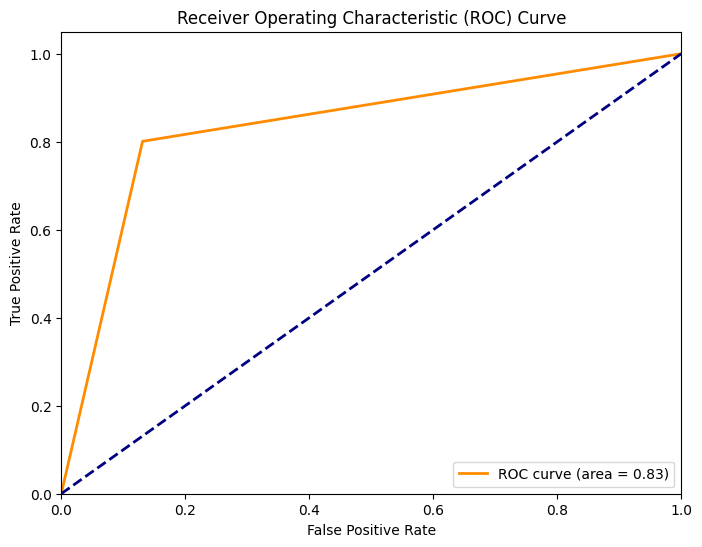

In [ ]:
# ROC Curve (for binary classification)
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained and tested your binary classifier and got predicted probabilities
fpr, tpr, _ = roc_curve(valid_y, gb_US_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

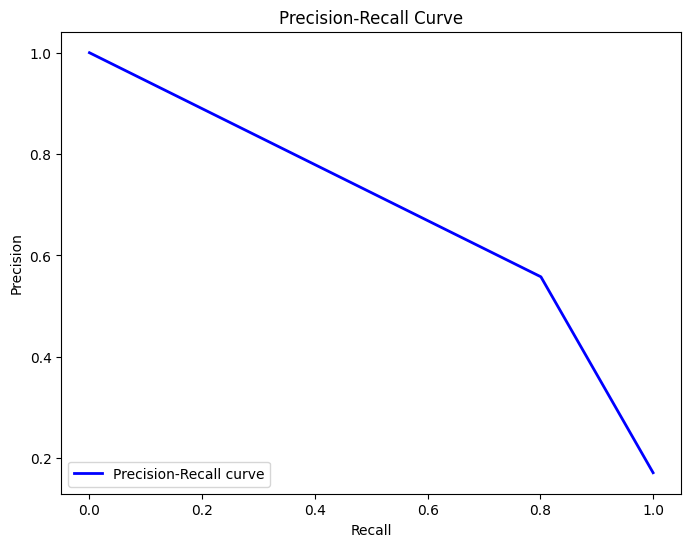

In [ ]:
# Precision-Recall Curve (for binary classification)
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(valid_y, gb_US_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

rfe = RFE(GB, n_features_to_select=1)
rfe.fit(X_train_US, y_train_US)
feature_ranks = rfe.ranking_

feature_names = X_train_US.columns
print("Feature ranking:")
for rank, name in sorted(zip(feature_ranks, feature_names)):
    print(f"Rank {rank}: {name}")

Feature ranking:
Rank 1: PageValues
Rank 2: ProductRelated_Duration
Rank 3: ExitRates
Rank 4: ProductRelated
Rank 5: Administrative_Duration
Rank 6: TrafficType
Rank 7: Administrative
Rank 8: SpecialDay
Rank 9: Informational_Duration
Rank 10: VisitorType
Rank 11: BounceRates
Rank 12: Informational
Rank 13: Browser
Rank 14: Region
Rank 15: OperatingSystems
Rank 16: Weekend


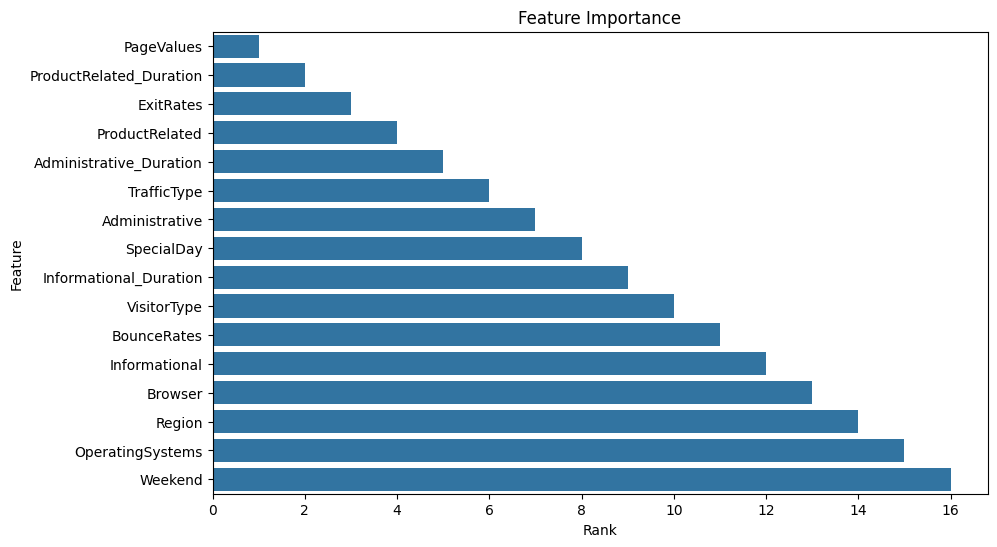

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming X_train_US is a DataFrame containing feature names
feature_importance_df = pd.DataFrame({'Feature': X_train_US.columns, 'Rank': feature_ranks})
feature_importance_df = feature_importance_df.sort_values(by='Rank')

plt.figure(figsize=(10, 6))
sns.barplot(x='Rank', y='Feature', data=feature_importance_df)
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [ ]:
# Support Vector Machine Classifier on original dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(valid_X)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, train_y)

svm_pred = svm.predict(X_test_scaled)

svm_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": svm_pred})
print(svm_pred_df.head(5))
print()
print(classification_report(valid_y, svm_pred))

       Actual  Predicted
12245   False      False
9704    False      False
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2044
        True       0.76      0.45      0.56       422

    accuracy                           0.88      2466
   macro avg       0.83      0.71      0.75      2466
weighted avg       0.87      0.88      0.87      2466



In [ ]:
# Support Vector Machine Classifier on oversampled dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_OS)
X_test_scaled = scaler.transform(valid_X)

svm.fit(X_train_scaled, y_train_OS)

svm_OS_pred = svm.predict(X_test_scaled)

svm_OS_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": svm_OS_pred})
print(svm_OS_pred_df.head(5))
print()
print(classification_report(valid_y, svm_OS_pred))

       Actual  Predicted
12245   False      False
9704    False      False
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.93      0.91      0.92      2044
        True       0.60      0.66      0.63       422

    accuracy                           0.87      2466
   macro avg       0.76      0.78      0.77      2466
weighted avg       0.87      0.87      0.87      2466



In [ ]:
# Support Vector Machine Classifier on undersampled dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_US)
X_test_scaled = scaler.transform(valid_X)

svm.fit(X_train_scaled, y_train_US)

svm_US_pred = svm.predict(X_test_scaled)

svm_US_pred_df = pd.DataFrame({"Actual": valid_y, "Predicted": svm_US_pred})
print(svm_US_pred_df.head(5))
print()
print(classification_report(valid_y, svm_US_pred))

       Actual  Predicted
12245   False      False
9704    False       True
9177    False      False
8848    False      False
2768    False      False

              precision    recall  f1-score   support

       False       0.94      0.87      0.90      2044
        True       0.53      0.72      0.61       422

    accuracy                           0.84      2466
   macro avg       0.73      0.79      0.76      2466
weighted avg       0.87      0.84      0.85      2466



In [ ]:
# Bagging classifier on original dataset
BG = BaggingClassifier(DecisionTreeClassifier(random_state = 1),
                       n_estimators = 100, random_state = 1)
BG.fit(train_X, train_y)

bag_pred = BG.predict(valid_X)
print(classification_report(valid_y, bag_pred))

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      2044
        True       0.72      0.55      0.62       422

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



In [ ]:
# Bagging classifier on oversampled dataset
BG.fit(X_train_OS, y_train_OS)
bag_OS_pred = BG.predict(valid_X)
print(classification_report(valid_y, bag_OS_pred))

              precision    recall  f1-score   support

       False       0.94      0.91      0.92      2044
        True       0.61      0.73      0.67       422

    accuracy                           0.88      2466
   macro avg       0.78      0.82      0.79      2466
weighted avg       0.89      0.88      0.88      2466



In [ ]:
# Bagging classifier on undersampled dataset
BG.fit(X_train_US, y_train_US)
bag_US_pred = BG.predict(valid_X)
print(classification_report(valid_y, bag_US_pred))

              precision    recall  f1-score   support

       False       0.96      0.86      0.90      2044
        True       0.54      0.81      0.65       422

    accuracy                           0.85      2466
   macro avg       0.75      0.83      0.78      2466
weighted avg       0.88      0.85      0.86      2466



In [ ]:
# Boosting classifier on original dataset
BT = AdaBoostClassifier(DecisionTreeClassifier(random_state=1),
                        n_estimators = 100, random_state=1)
BT.fit(train_X,train_y)

boost_pred = BT.predict(valid_X)
print(classification_report(valid_y, boost_pred))

              precision    recall  f1-score   support

       False       0.91      0.91      0.91      2044
        True       0.57      0.57      0.57       422

    accuracy                           0.85      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.85      0.85      0.85      2466



In [ ]:
# Boosting classifier on oversampled dataset
BT.fit(X_train_OS, y_train_OS)
boost_OS_pred = BT.predict(valid_X)
print(classification_report(valid_y, boost_OS_pred))

              precision    recall  f1-score   support

       False       0.92      0.89      0.90      2044
        True       0.54      0.63      0.58       422

    accuracy                           0.84      2466
   macro avg       0.73      0.76      0.74      2466
weighted avg       0.86      0.84      0.85      2466



In [ ]:
# Boosting classifier on undersampled dataset
BT.fit(X_train_US, y_train_US)
boost_US_pred = BT.predict(valid_X)
print(classification_report(valid_y, boost_US_pred))

              precision    recall  f1-score   support

       False       0.94      0.77      0.85      2044
        True       0.40      0.75      0.53       422

    accuracy                           0.77      2466
   macro avg       0.67      0.76      0.69      2466
weighted avg       0.85      0.77      0.79      2466



In [ ]:
# Random Forest classifier on original dataset
RF = RandomForestClassifier(n_estimators = 500, random_state = 1)
RF.fit(train_X, train_y)

rf_pred = RF.predict(valid_X)
print(classification_report(valid_y, rf_pred))

              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2044
        True       0.75      0.55      0.63       422

    accuracy                           0.89      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.88      0.89      0.88      2466



In [ ]:
# Random Forest classifier on oversampled dataset
RF.fit(X_train_OS, y_train_OS)

rf_OS_pred = RF.predict(valid_X)
print(classification_report(valid_y, rf_OS_pred))

              precision    recall  f1-score   support

       False       0.94      0.91      0.92      2044
        True       0.62      0.74      0.67       422

    accuracy                           0.88      2466
   macro avg       0.78      0.82      0.80      2466
weighted avg       0.89      0.88      0.88      2466



In [ ]:
# Random Forest classifier on undersampled dataset
RF.fit(X_train_US, y_train_US)

rf_US_pred = RF.predict(valid_X)
print(classification_report(valid_y, rf_US_pred))

              precision    recall  f1-score   support

       False       0.96      0.87      0.91      2044
        True       0.56      0.82      0.66       422

    accuracy                           0.86      2466
   macro avg       0.76      0.84      0.79      2466
weighted avg       0.89      0.86      0.87      2466



In [ ]:
# Neural network on original dataset
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
train_X = pd.DataFrame(train_X, columns = X.columns)

valid_X = scaler.fit_transform(valid_X)
valid_X = pd.DataFrame(valid_X, columns = X.columns)

nn = MLPClassifier(hidden_layer_sizes = (100,30,15),
                   activation = "relu",
                   solver = 'adam',
                   learning_rate = "adaptive",
                   learning_rate_init= 0.001,
                   max_iter=500, warm_start = False)
nn_model = nn.fit(train_X, train_y)
nn_pred= nn_model.predict(valid_X)
print(classification_report(valid_y, nn_pred))

              precision    recall  f1-score   support

       False       0.90      0.95      0.93      2044
        True       0.69      0.51      0.59       422

    accuracy                           0.88      2466
   macro avg       0.80      0.73      0.76      2466
weighted avg       0.87      0.88      0.87      2466



In [ ]:
# Neural network on oversampled dataset
scaler_ov = MinMaxScaler()
X_train_OS = scaler_ov.fit_transform(X_train_OS)
X_train_OS = pd.DataFrame(X_train_OS, columns = X.columns)

nn_OS_model = nn.fit(X_train_OS, y_train_OS)
nn_OS_pred= nn_OS_model.predict(valid_X)
print(classification_report(valid_y, nn_OS_pred))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91      2044
        True       0.55      0.68      0.61       422

    accuracy                           0.85      2466
   macro avg       0.74      0.79      0.76      2466
weighted avg       0.87      0.85      0.86      2466



In [ ]:
# Neural network on undersampled dataset
scaler_us = MinMaxScaler()
X_train_US = scaler_us.fit_transform(X_train_US)
X_train_US = pd.DataFrame(X_train_US, columns = X.columns)

nn_US_model = nn.fit(X_train_US, y_train_US)
nn_US_pred= nn_US_model.predict(valid_X)
print(classification_report(valid_y, nn_US_pred))

              precision    recall  f1-score   support

       False       0.95      0.83      0.89      2044
        True       0.49      0.78      0.60       422

    accuracy                           0.82      2466
   macro avg       0.72      0.80      0.74      2466
weighted avg       0.87      0.82      0.84      2466



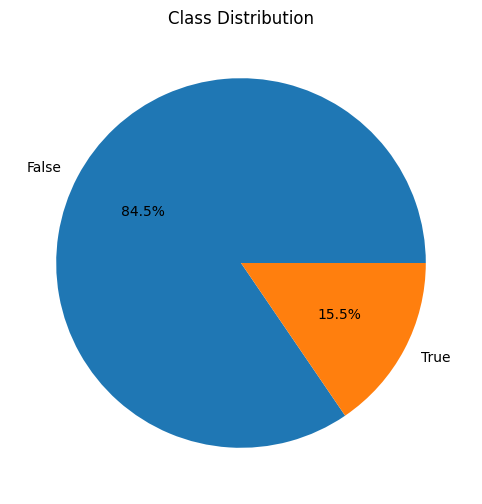

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Pie Chart for class distribution
plt.figure(figsize=(8, 6))
shoppers_data['Revenue'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

In [ ]:
shoppers_data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

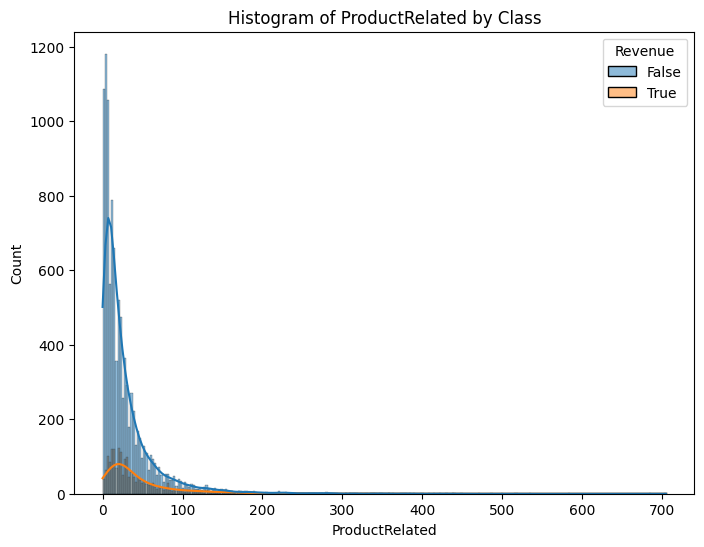

In [ ]:
# Histogram for numerical feature by class
plt.figure(figsize=(8, 6))
sns.histplot(data=shoppers_data, x='ProductRelated', hue='Revenue', kde=True)
plt.title('Histogram of ProductRelated by Class')
plt.xlabel('ProductRelated')
plt.ylabel('Count')
plt.show()


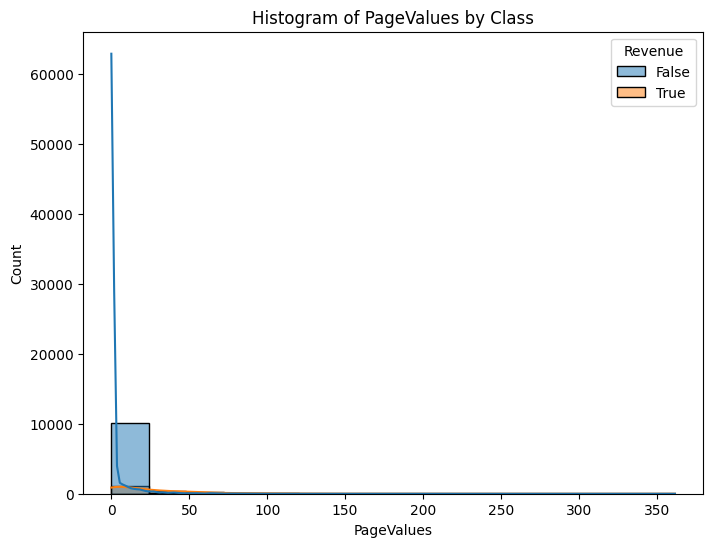

In [ ]:
# Histogram for numerical feature by class
plt.figure(figsize=(8, 6))
sns.histplot(data=shoppers_data, x='PageValues', hue='Revenue', kde=True)
plt.title('Histogram of PageValues by Class')
plt.xlabel('PageValues')
plt.ylabel('Count')
plt.show()
